#Dog Vs Cat Classification

In [0]:
!wget 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip'

!unzip kagglecatsanddogs_3367a.zip


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


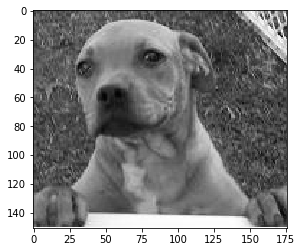

In [3]:

DATADIR = "PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
training_data = []
IMG_SIZE=75

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [00:11<00:00, 1055.36it/s]

24946


In [0]:
import random

random.shuffle(training_data)

In [0]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [8]:




X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))




Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [13]:
model.fit(X, y, batch_size=32, epochs=100, validation_split=0.3)

Train on 17462 samples, validate on 7484 samples
Epoch 1/100
17462/17462 [==============================] - 23s 1ms/sample - loss: 0.0383 - acc: 0.9851 - val_loss: 1.8964 - val_acc: 0.7492
Epoch 2/100
17462/17462 [==============================] - 22s 1ms/sample - loss: 0.0334 - acc: 0.9874 - val_loss: 1.8272 - val_acc: 0.7484
Epoch 3/100
17462/17462 [==============================] - 22s 1ms/sample - loss: 0.0326 - acc: 0.9881 - val_loss: 1.7566 - val_acc: 0.7479
Epoch 4/100
17462/17462 [==============================] - 22s 1ms/sample - loss: 0.0357 - acc: 0.9877 - val_loss: 1.7500 - val_acc: 0.7400
Epoch 5/100
17462/17462 [==============================] - 22s 1ms/sample - loss: 0.0277 - acc: 0.9912 - val_loss: 1.9335 - val_acc: 0.7410
Epoch 6/100
17462/17462 [==============================] - 22s 1ms/sample - loss: 0.0309 - acc: 0.9889 - val_loss: 2.0929 - val_acc: 0.7468
Epoch 7/100
17462/17462 [==============================] - 22s 1ms/sample - loss: 0.0322 - acc: 0.9888 - val_lo